<a href="https://colab.research.google.com/github/maskilx/Reserve-duty-assignment/blob/main/Copy_of_mid1_sem_fodl_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Traffic-Signs-Dataset With NumPy
Sign Language Digits dataset contains 6,117 grayscale images in 51 diffrent categories. The images show individual traffic sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/4775089/8088685/78bf13b7b1244a147ada8f4f77a864c3/dataset-cover.png?t=2024-04-11-13-48-38"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
from PIL import Image
from pathlib import Path
import csv
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Dwonload Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1aJkqX8m_cu3DFLqkOXBR4A1jr8eHN1AP
!unzip full_dataset_with_labels.zip -d traffic_signs
%load_ext autotime

time: 442 µs (started: 2026-01-03 08:22:57 +00:00)


In [ ]:
ROOT = Path("/content/traffic_signs/full_dataset")
X, y = [], []

for c in sorted(p for p in ROOT.iterdir() if p.is_dir()):
    for img in c.iterdir():
        if img.suffix.lower() in {".png", ".jpg", ".jpeg"}:
            X.append(
                np.asarray(
                    Image.open(img).convert("L").resize((28, 28)),
                    dtype=np.uint8
                ).ravel()
            )
            y.append(int(c.name))

time: 16.6 s (started: 2026-01-03 08:22:57 +00:00)


Brief explanation of the files:

* The `full_dataset` folder contains severalinner folders, with each inner folder containing a different class of sign images.
* The `labels` file is a CSV file that contains two columns, the first column is called ***ClassId*** and contains the class number corresponding to the names of the inner folders of full_dataset. The second column called ***Name*** and contains the meaning of each Class that represents a specific type of sign.



---


This dataset is based on traffic sign images.
Each image represents a traffic sign class (for example: speed limit, stop sign, warning sign, etc.).

All images were:

* converted to grayscale

* resized to 28×28 pixels

* flattened into a single vector

The full dataset contains 6,116 images in total.


In [ ]:
with open("/content/traffic_signs/labels.csv", newline='', encoding="utf-8") as f:
    reader = csv.reader(f)
    rows = [next(reader) for _ in range(6)]

print(tabulate(rows[1:], headers=rows[0], tablefmt="github"))

|   ClassId | Name                 |
|-----------|----------------------|
|         0 | Speed limit (5km/h)  |
|         1 | Speed limit (15km/h) |
|         2 | Speed limit (30km/h) |
|         3 | Speed limit (40km/h) |
|         4 | Speed limit (50km/h) |
time: 2.9 ms (started: 2026-01-03 08:24:24 +00:00)


In [ ]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)


(6116, 784) (6116,)
time: 8.77 ms (started: 2026-01-03 08:24:27 +00:00)


### After preprocessing, the dataset is stored in two variables:
`X` - **Feature Matrix**
* Each row in X represents one image
* Each image is a vector of 784 values (because 28 × 28 = 784)
* Each value corresponds to the pixel intensity of the image (grayscale)
* `X[i]` → the pixel data of the i-th image
* `X[i].reshape(28, 28)` → reconstructs the original image


`y` - **Label Vector**
* `y` contains the class label for each image in `X`
* `y[i]` is the class ID of the image stored in `X[i]`
* The label tells the model which class the image belongs to


---


### Here is an example image from the dataset:

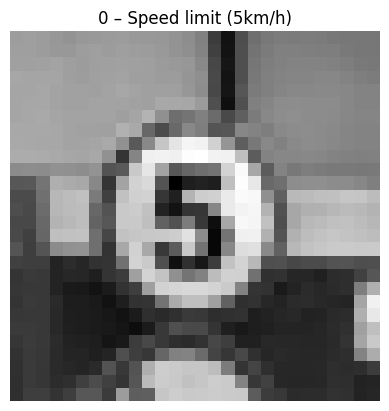

time: 78.8 ms (started: 2026-01-03 08:24:29 +00:00)


In [ ]:
# load label descriptions
with open("/content/traffic_signs/labels.csv") as f:
    label_map = {int(r["ClassId"]): r["Name"] for r in csv.DictReader(f)}

# plot first image
plt.imshow(X[0].reshape(28, 28), cmap="gray")
plt.title(f"{y[0]} – {label_map[y[0]]}")
plt.axis("off")
plt.show()

## Data preprocessing (10%)

### Feature scaling (Normalization)
Before training the neural network, the image data is normalized by dividing all pixel values by 255.
Since pixel intensities range from **0 to 255**, this operation scales all features to the range **[0, 1]**.

Feature scaling:
* Improves numerical stability
* Speeds up training convergence
* Prevents large input values from dominating the learning process

This step is essential when training neural networks using gradient-based optimization.

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 6116)
time: 16.5 ms (started: 2026-01-03 08:24:32 +00:00)


### Select two classes
For the next stage of this assignment, you will work with only two classes from the dataset:
class 19 and class 28.

Your task is to:
1. Filter the dataset so that it contains only samples belonging to class 19 and class 28.
2. Create new variables:
    * `X_binary`– containing only the images from these two classes
    * `y_binary`– containing the corresponding labels
3. Re-label the classes so that:
    * class 19 → label `0`
    * class 28 → label `1`

This preprocessing step is required because later you will implement a neural network using NumPy only, which will perform binary classification between these two traffic sign classes.
Make sure that:
* The number of samples in `X_binary` and `y_binary` is the same
* Each image in `X_binary` still has 784 features
* The labels in `y_binary` correspond correctly to the filtered images

In [ ]:
#TODO: select two classes
mask = (y == 19) | (y == 28) #select two classes to make binary problem
X_binary = X[mask]
y_binary = y[mask]
print("labels before relabel:", np.unique(y_binary))
y_binary= np.where(y_binary==19,0,1) #relabel
print("labels after relabel:", np.unique(y_binary))
print(X_binary.shape, y_binary.shape)

labels before relabel: [19 28]
labels after relabel: [0 1]
(1014, 784) (1014,)
time: 9.1 ms (started: 2026-01-03 08:24:34 +00:00)


### Split the data into Train set and Test set

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

# Shuffle the data
shuffled_indices = np.random.permutation(len(X_binary))
X_shuffled = X_binary[shuffled_indices]
Y_shuffled = y_binary[shuffled_indices]

# Split 80/20
m = len(X_shuffled) #number of images
split_index = int(0.8 * m) #index where the train set end and the test set begin

X_train = X_shuffled[:split_index] #train 80% 811
Y_train = Y_shuffled[:split_index]
X_test = X_shuffled[split_index:] #test 20% 203
Y_test = Y_shuffled[split_index:]

# Normalize pixel values
X_train = X_train / 255
X_test = X_test / 255

# Transpose so each column is an example
X_train = X_train.T
X_test = X_test.T

# Make labels shape (1, -1)
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (784, 811)
Y_train shape: (1, 811)
X_test shape: (784, 203)
Y_test shape: (1, 203)
time: 5.54 ms (started: 2026-01-03 08:24:36 +00:00)


### Test yourself

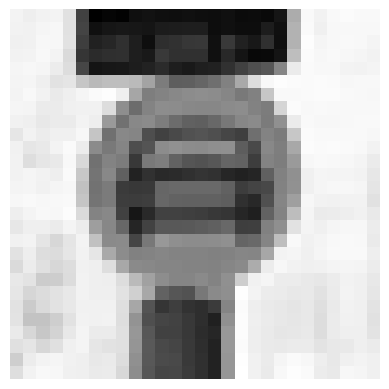

Label: 1
time: 34.1 ms (started: 2026-01-03 08:24:38 +00:00)


In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random
import matplotlib
i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print("Label:", Y_train[0, i])

## Activation functions (10%)
**Implement the Sigmoid Activation Function**

In this task, you will implement the sigmoid activation function, which is commonly used in neural networks for binary classification.

The sigmoid function maps any real-valued input to a value between 0 and 1, allowing the output to be interpreted as a probability.

The mathematical definition of the sigmoid function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

time: 462 µs (started: 2026-01-03 08:24:41 +00:00)


## Loss Function – Binary Cross-Entropy (10%)

n this part, you will implement the **Binary Cross-Entropy (BCE) loss function**, also known as logistic loss.
This loss function measures how well the predicted probability of the neural network matches the true label of a training example.

The main idea behind BCE loss is:
* The loss should be **zero** when the model is perfectly confident and correct.
* The loss should grow **very large** when the model is confident but wrong.

More specifically:
* If the true label is $y = 1$, the loss should be zero when the predicted probability $\hat{p} = 1$.
* If the true label is $y = 0$, the loss should be zero when the predicted probability $\hat{p} = 0$.

Any deviation from these ideal predictions should result in a positive loss value.


---

**Numerical Stability**
When implementing the loss function, be careful with the logarithm operation:
* log(0) is undefined and leads to **infinite values**
* Extremely large or small values can cause numerical instability

To avoid this, you should ensure that the predicted probability $\hat{p}$. is kept within a safe range (for example, by clipping it slightly away from 0 and 1).



In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

time: 671 µs (started: 2026-01-03 08:24:43 +00:00)


## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 128
learning_rate = 0.01
epochs = 50

time: 529 µs (started: 2026-01-03 08:25:03 +00:00)


## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(128, 784)
(128, 1)
(1, 128)
(1, 1)
time: 4.65 ms (started: 2026-01-03 08:25:07 +00:00)


## Training (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X_train.shape[1]  # number of training examples

print(X_train.shape, Y_train.shape)
print(W1.shape, b1.shape, W2.shape, b2.shape)

for i in range(epochs):
    avg_epoch_loss = 0.0  # float accumulator

    for j in range(num_of_examples):
        # Forward propagation
        x = X[:, j].reshape(-1, 1)
        y_true = Y[:, j].reshape(-1, 1)

        Z1 = np.matmul(W1, x) + b1
        A1 = sigmoid(Z1)

        Z2 = np.matmul(W2, A1) + b2
        A2 = sigmoid(Z2)

        Yout = y_true

        # Compute loss
        loss = float(log_loss(A2, Yout))
        avg_epoch_loss += loss

        # Back propagation
        dZ2 = (A2 - Yout)
        dW2 = np.matmul(dZ2, A1.T)
        db2 = dZ2  # single example

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * A1 * (1 - A1)   # sigmoid derivative
        dW1 = np.matmul(dZ1, x.T)
        db1 = dZ1  # single example

        # Update weights
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

    avg_epoch_loss = avg_epoch_loss / num_of_examples
    loss_list.append(avg_epoch_loss)
    epoch_list.append(i)

    print("Epoch", i, "Loss:", avg_epoch_loss)


(784, 811) (1, 811)
(128, 784) (128, 1) (1, 128) (1, 1)


/tmp/ipython-input-94522764.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss = float(log_loss(A2, Yout))   # ensures scalar (no (1,1) arrays)


Epoch 0 Loss: 0.002864454037834843
Epoch 1 Loss: 0.002839685110612202
Epoch 2 Loss: 0.002815296304687119
Epoch 3 Loss: 0.0027912794212683494
Epoch 4 Loss: 0.0027676265022531675
Epoch 5 Loss: 0.0027443298210777537
Epoch 6 Loss: 0.002721381873943628
Epoch 7 Loss: 0.0026987753714048774
Epoch 8 Loss: 0.002676503230302394
Epoch 9 Loss: 0.002654558566031308
Epoch 10 Loss: 0.002632934685128965
Epoch 11 Loss: 0.0026116250781709712
Epoch 12 Loss: 0.0025906234129636618
Epoch 13 Loss: 0.002569923528021694
Epoch 14 Loss: 0.002549519426319535
Epoch 15 Loss: 0.0025294052693067767
Epoch 16 Loss: 0.0025095753711768688
Epoch 17 Loss: 0.0024900241933793967
Epoch 18 Loss: 0.0024707463393668213
Epoch 19 Loss: 0.0024517365495661555
Epoch 20 Loss: 0.0024329896965670094
Epoch 21 Loss: 0.0024145007805174297
Epoch 22 Loss: 0.0023962649247192725
Epoch 23 Loss: 0.0023782773714152213
Epoch 24 Loss: 0.0023605334777597243
Epoch 25 Loss: 0.002343028711966501
Epoch 26 Loss: 0.002325758649625303
Epoch 27 Loss: 0.00230

### Loss Visualization

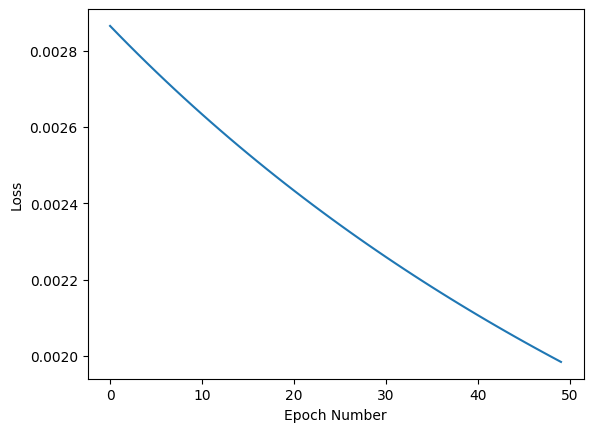

time: 107 ms (started: 2026-01-03 08:52:22 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Forward
X = X_test

Z1 = np.matmul(W1, X) + b1
A1 = sigmoid(Z1)

Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

y_pred = (A2 >= 0.5).astype(int).reshape(-1)   # if output>=0.5 => 1 else 0
y_true = Y.reshape(-1).astype(int)

# Confusion Matrix + Accuracy
cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Number of test samples:", y_true.shape[0])



Confusion Matrix:
 [[ 99   0]
 [  0 104]]
Accuracy: 1.0
Number of test samples: 203
time: 13.5 ms (started: 2026-01-03 08:58:32 +00:00)


### Visualize the results

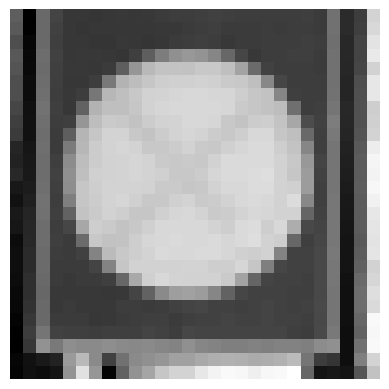

Real = 0, Predicted = 0, Probability = 0.0036


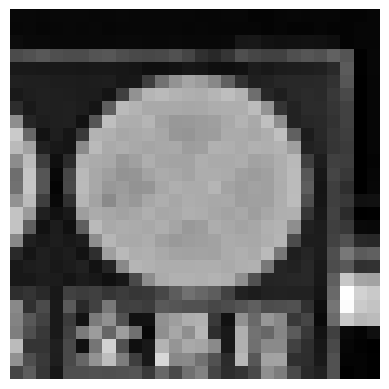

Real = 0, Predicted = 0, Probability = 0.0089


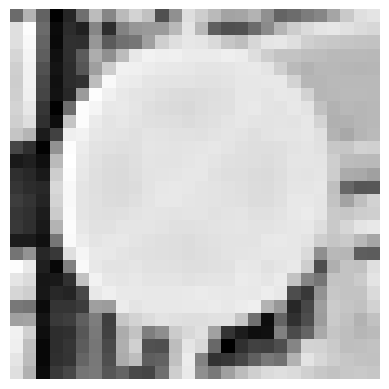

Real = 0, Predicted = 0, Probability = 0.0007


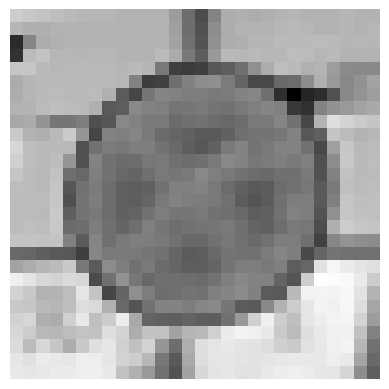

Real = 0, Predicted = 0, Probability = 0.0004


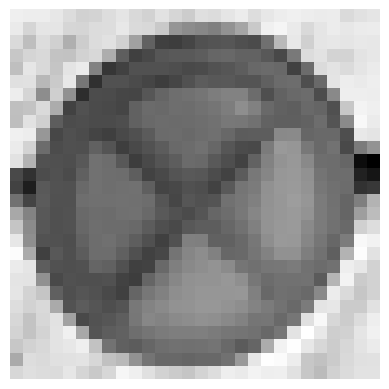

Real = 0, Predicted = 0, Probability = 0.0027


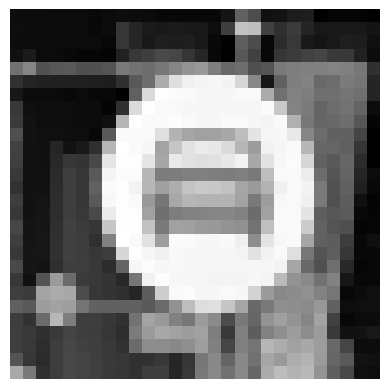

Real = 1, Predicted = 1, Probability = 0.9991


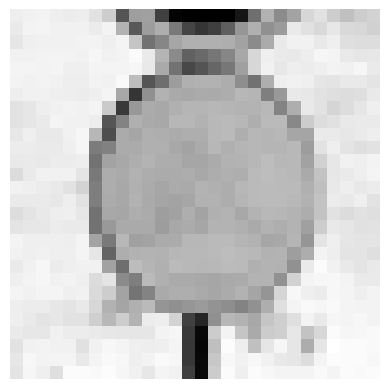

Real = 0, Predicted = 0, Probability = 0.0002


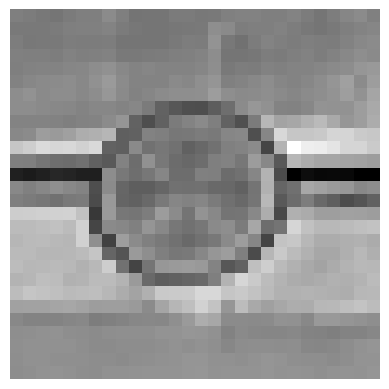

Real = 0, Predicted = 0, Probability = 0.0186


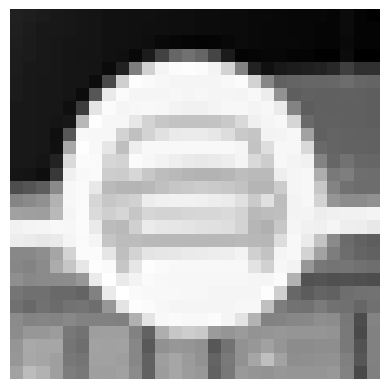

Real = 1, Predicted = 1, Probability = 0.9979


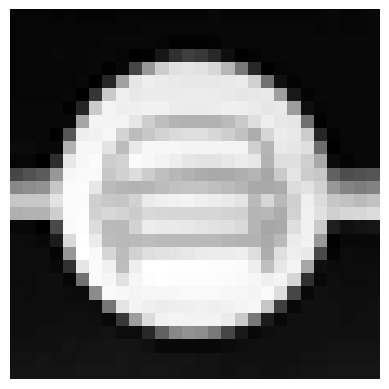

Real = 1, Predicted = 1, Probability = 0.9682
time: 330 ms (started: 2026-01-03 09:10:43 +00:00)


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random
m = X_test.shape[1]

for _ in range(10):
    i = random.randint(m)

  #show the image
    plt.imshow(X_test[:, i].reshape(28, 28), cmap=plt.cm.binary)
    plt.axis("off")
    plt.show()

    prob = float(A2[0, i])      # probab
    pred = int(y_pred[i])       # 0/1
    real = int(y_true[i])       # 0/1

    print(f"Real = {real}, Predicted = {pred}, Probability = {prob:.4f}")

# Good Luck!!